## Stats - 1 Assignment

Calculate the mean, median, mode and standard deviation for the problem  statements 1& 2.

In [31]:
import numpy as np
from scipy import stats
import seaborn as sns
sns.set()

Problem Statement 1:  

The marks awarded for an assignment set for a Year 8 class of 20 students were as  follows: <br />
6 7 5 7 7 8 7 6 9 7 4 10 6 8 8 9 5 6 4 8 


In [2]:
marks = [6,7,5,7,7,8,7,6,9,7,4,10,6,8,8,9,5,6,4,8]
print(f'Mean : {np.mean(marks)} \nMedian : {np.median(marks)} \nMode : {int(stats.mode(marks)[0])} \nStandard Deviation : {np.round(np.std(marks),3)}')

Mean : 6.85 
Median : 7.0 
Mode : 7 
Standard Deviation : 1.59


Problem Statement 2:  

The number of calls from motorists per day for roadside service was recorded for a  particular month: <br />
28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170,  100, 75, 104, 97, 75, 
123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109 

In [3]:
calls = [28, 122, 217, 130, 120, 86, 80, 90, 140, 120, 70, 40, 145, 113, 90, 68, 174, 194, 170, 100, 75, 104, 97, 75, 123, 100, 75, 104, 97, 75, 123, 100, 89, 120, 109]
print(f'Mean : {np.round(np.mean(calls),3)} \nMedian : {np.median(calls)} \nMode : {int(stats.mode(calls)[0])} \nStandard Deviation : {np.round(np.std(calls),3)}')

Mean : 107.514 
Median : 100.0 
Mode : 75 
Standard Deviation : 38.773


Problem Statement 3:  

The number of times I go to the gym in weekdays, are given below along with its  associated probability: <br />
x = 0, 1, 2, 3, 4, 5 <br/>
f(x) = 0.09, 0.15, 0.40, 0.25, 0.10, 0.01 <br/>
Calculate the mean no. of workouts in a week. Also evaluate the variance involved in  it.<br/>


In [5]:
x = np.array([0,1,2,3,4,5])
fx = np.array([0.09,0.15,0.40,0.25,0.10,0.01])

In [18]:
mean = sum(x*fx) # μ = Σ(x*f(x))
var = sum((np.square(x - mean)) * fx) #Var(X) = Σ((xi - μ)² * f(x))

print(f'''The mean number of workouts in a week is {mean} 
and variance involved in it is {var}''')

The mean number of workouts in a week is 2.15 
and variance involved in it is 1.2275


Problem Statement 4:

Let the continuous random variable D denote the diameter of the hole drilled in an 
aluminum sheet. The target diameter to be achieved is 12.5mm. Random 
disturbances in the process often result in inaccuracy.
Historical data shows that the distribution of D can be modelled by the PDF (𝑑) = 
20𝑒<sup>−20(𝑑−12.5)</sup>, 𝑑 ≥ 12.5. If a part with diameter > 12.6 mm needs to be scrapped, 
what is the proportion of those parts? What is the CDF when the diameter is of 11 
mm? What is your conclusion regarding the proportion of scraps?

In [31]:
from scipy.integrate import quad #For integration

#Diameter above 12.6mm needs to be scraped so integrating PDF from 12.6 to infinity would result the proportion

def integrand(d):
    return 20*(np.exp(-20*(d-12.5)))

I,err = quad(integrand,12.6,np.inf) 

print(f'''The proportion of those parts that needs to be scraped is around {round(I,3) * 100}%''')

The proportion of those parts that needs to be scraped is around 13.5%


In [43]:
#CDF = ∫PDF when d = 11mm

J,err = quad(integrand,12.5,11) 
if J < 0:
    print('Value is 0')

Value is 0


Since the value of CDF can only be between 0 to 1 , so CDF when the diameter is of 11mm is 0(Zero)

Problem Statement 5:

A company manufactures LED bulbs with a faulty rate of 30%. If I randomly select 6
chosen LEDs, what is the probability of having 2 faulty LEDs in my sample?
Calculate the average value of this process. Also evaluate the standard deviation
associated with it.

In [58]:
from scipy.stats import binom

#Choosing 2(k) from 6(n) and probability of fault(p) is 0.3 and probability of not fault(q) is 0.7(1-p)
n = 6
k = 2
p = 0.3
q = 1 - p

prob = binom.pmf(k=k,n=n,p=p)  #binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k) 

print('Probability of having 2 faulty LEDs in my sample is ',round(prob,3))
print('Average value of this process',n*p)
print('Standard Deviation of this process',np.sqrt(n*p*q))

Probability of having 2 faulty LEDs in my sample is  0.324
Average value of this process 1.7999999999999998
Standard Deviation of this process 1.1224972160321822


Problem Statement 6:

Gaurav and Barakha are both preparing for entrance exams. Gaurav attempts to
solve 8 questions per day with a correction rate of 75%, while Barakha averages
around 12 questions per day with a correction rate of 45%. What is the probability
that each of them will solve 5 questions correctly?<br/> What happens in cases of 4 and 6
correct solutions? What do you infer from it?<br/> What are the two main governing
factors affecting their ability to solve questions correctly? <br/>Give a pictorial
representation of the same to validate your answer

In [14]:
from scipy.stats import binom
import matplotlib.pyplot as plt
%matplotlib inline

In [71]:
gaurav_total_questions = 8
barakha_total_questions = 12

gaurav_corr_rate = 0.75
barakha_corr_rate = 0.45

#binom.pmf(k) = choose(n, k) * p**k * (1-p)**(n-k) 

print('The probability that Gaurav will solve 5 questions correctly',f'{binom.pmf(k=5,n=gaurav_total_questions,p=gaurav_corr_rate):.4f}')
print('The probability that Barakha will solve 5 questions correctly',f'{binom.pmf(k=5,n=barakha_total_questions,p=barakha_corr_rate):.4f}')

print('The probability that Gaurav will solve 4 questions correctly',f'{binom.pmf(k=4,n=gaurav_total_questions,p=gaurav_corr_rate):.4f}')
print('The probability that Barakha will solve 4 questions correctly',f'{binom.pmf(k=4,n=barakha_total_questions,p=barakha_corr_rate):.4f}')

print('The probability that Gaurav will solve 6 questions correctly',f'{binom.pmf(k=6,n=gaurav_total_questions,p=gaurav_corr_rate):.4f}')
print('The probability that Barakha will solve 6 questions correctly',f'{binom.pmf(k=6,n=barakha_total_questions,p=barakha_corr_rate):.4f}')

The probability that Gaurav will solve 5 questions correctly 0.2076
The probability that Barakha will solve 5 questions correctly 0.2225
The probability that Gaurav will solve 4 questions correctly 0.0865
The probability that Barakha will solve 4 questions correctly 0.1700
The probability that Gaurav will solve 6 questions correctly 0.3115
The probability that Barakha will solve 6 questions correctly 0.2124


In [76]:
gaurav_pmf = [binom.pmf(k,n = gaurav_total_questions,p=gaurav_corr_rate) for k in range(gaurav_total_questions+1)]
barakha_pmf = [binom.pmf(k,n = barakha_total_questions,p=barakha_corr_rate) for k in range(barakha_total_questions+1)]

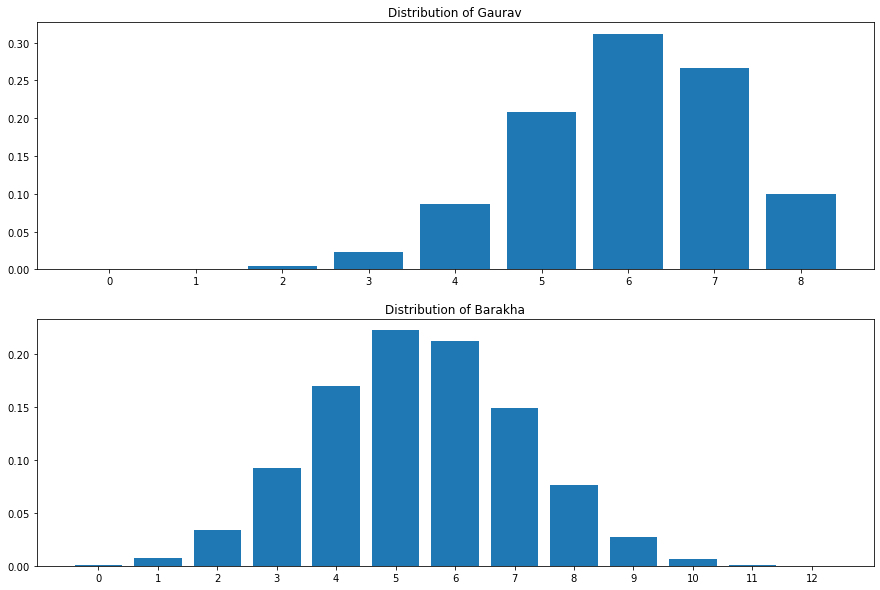

In [105]:
fig,((ax1,ax2)) = plt.subplots(2,1,figsize = (15,10))

ax1.bar(list(range(gaurav_total_questions+1)), gaurav_pmf)
ax1.set_title('Distribution of Gaurav')
ax1.set_xticks(list(range(gaurav_total_questions+1)))

ax2.bar(list(range(barakha_total_questions+1)), barakha_pmf)
ax2.set_title('Distribution of Barakha')
ax2.set_xticks(list(range(barakha_total_questions+1)))


plt.show()

Problem Statement 7:

Customers arrive at a rate of 72 per hour to my shop. What is the probability of 𝑘
customers arriving in 4 minutes? <br/>a) 5 customers <br/> b) not more than 3 customers <br/> c)
more than 3 customers. <br/>Give a pictorial representation of the same to validate your
answer.

In [1]:
from scipy.stats import poisson

In [8]:
mean = (72/60) * 4 #per hour is converted to per min 

print('Probability of 5 customers arriving in 4 minutes is ',poisson.pmf(k = 5,mu = mean))

print('Probability of not more than 3 customers arriving in 4 minutes is ', prob_3 := sum([poisson.pmf(k = r,mu = mean) for r in range(4)]))

print('Probability of more than 3 customers arriving in 4 minutes is ',1 - prob_3)

Probability of 5 customers arriving in 4 minutes is  0.17474768364388296
Probability of not more than 3 customers arriving in 4 minutes is  0.29422991649656405
Probability of more than 3 customers arriving in 4 minutes is  0.705770083503436


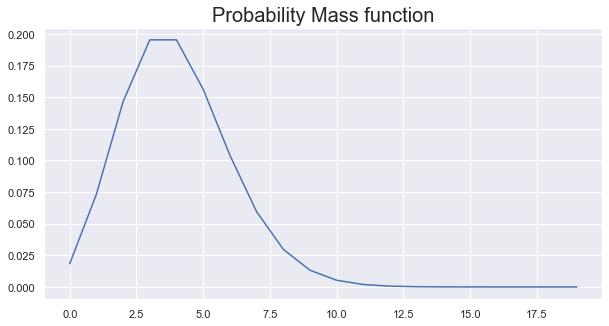

In [38]:
x = np.arange(20)
data = poisson.pmf(k = x,mu = 4)

fig = plt.figure(figsize= (10,5) )
plt.title('Probability Mass function',fontsize = 20)
plt.plot(x,data)
plt.show()

Problem Statement 8:

I work as a data analyst in Aeon Learning Pvt. Ltd. After analyzing data, I make 
reports, where I have the efficiency of entering 77 words per minute with 6 errors per 
hour. <br/>
What is the probability that I will commit 2 errors in a 455-word financial report?
What happens when the no. of words increases/decreases (in case of 1000 words, 
255 words)?<br/> 
How is the 𝜆 affected? <br/>
How does it influence the PMF? <br/> 
Give a pictorial representation of the same to validate your answer<br/>

In [55]:
print(f'455 word financial report can be written in {(455/77):.3f} minutes')
print(f'Errors per minute is {(6/60)}')

lmda = 5.909 * 0.1
print(f'Rate parameter(lambda) = {lmda}')


455 word financial report can be written in 5.909 minutes
Errors per minute is 0.1
Rate parameter(lambda) = 0.5909


In [57]:
print('Probability that 2 errors will be commited in a 455-word financial report is ',round(poisson.pmf(mu = lmda,k=2),3))

Probability that 2 errors will be commited in a 455-word financial report is  0.097


In [61]:
print(f'''
If the number of words increases, the time taken to write them will increase. If the time increases, the expected number of errors in that time period will increase. Hence, λ will increase.

If the number of words is 1000, then 

λ = {(1000/77)*(6/60):.3f}

Hence, λ has increased.

If the number of words decreases, the time taken to write them will decrease. If the time decreases, the expected number of errors in that time period will also decrease. Hence, λ will decrease.

If the number of words is 255, then 

λ = {(255/77)*(6/60):.3f}

Hence, λ has decreased.''')


If the number of words increases, the time taken to write them will increase. If the time increases, the expected number of errors in that time period will increase. Hence, λ will increase.

If the number of words is 1000, then 

λ = 1.299

Hence, λ has increased.

If the number of words decreases, the time taken to write them will decrease. If the time decreases, the expected number of errors in that time period will also decrease. Hence, λ will decrease.

If the number of words is 255, then 

λ = 0.331

Hence, λ has decreased.


In [67]:
print('''
In the case when we want to know the probability of 2 errors, the more closer the λ is to 2, higher will be the probability.
So, if the number of words increases to 1000, λ  will increase to 1.299 which is closer to 2 than the case when the number of words decreases to 255 in which case λ  decreases to 0.331 and gets farther from 2.

Hence,the probability of making 2 errors will increase if the number of words is increased, and the probability of making 2 errors will decrease if the number of words is decreased.''')


In the case when we want to know the probability of 2 errors, the more closer the λ is to 2, higher will be the probability.
So, if the number of words increases to 1000, λ  will increase to 1.299 which is closer to 2 than the case when the number of words decreases to 255 in which case λ  decreases to 0.331 and gets farther from 2.

Hence,the probability of making 2 errors will increase if the number of words is increased, and the probability of making 2 errors will decrease if the number of words is decreased.


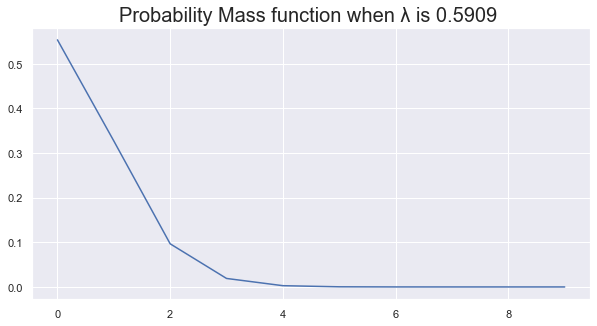

In [72]:
y1 = np.arange(10)
data1 = poisson.pmf(k = y1,mu = lmda)

fig = plt.figure(figsize= (10,5) )
plt.title('Probability Mass function when λ is 0.5909 ',fontsize = 20)
plt.plot(y1,data1)
plt.show()

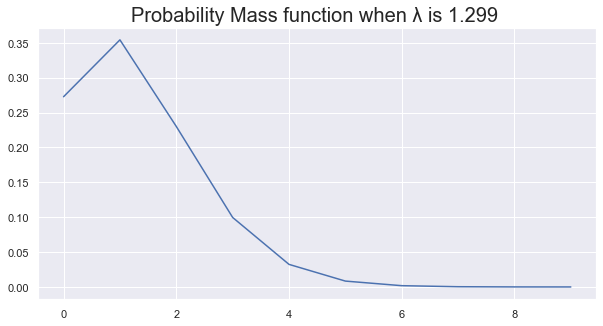

In [77]:
y2 = np.arange(10)
data2 = poisson.pmf(k = y2,mu = 1.299)

fig = plt.figure(figsize= (10,5) )
plt.title('Probability Mass function when λ is 1.299 ',fontsize = 20)
plt.plot(y2,data2)
plt.show()

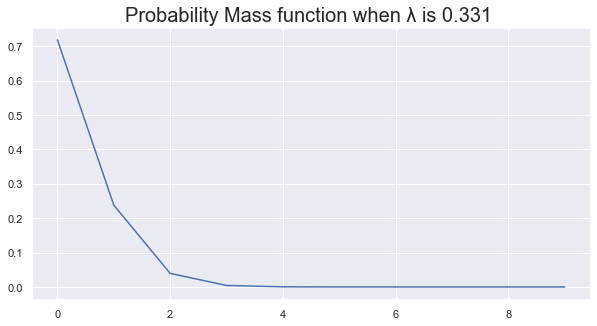

In [75]:
y3 = np.arange(10)
data3 = poisson.pmf(k = y3,mu = 0.331)

fig = plt.figure(figsize= (10,5) )
plt.title('Probability Mass function when λ is 0.331 ',fontsize = 20)
plt.plot(y3,data3)
plt.show()

Problem Statement 10:

Please compute the following:<br/>
a) P(Z > 1.26), . P(Z < −0.86), P(Z > −1.37), P(−1.25 < Z < 0.37), . P(Z ≤ −4.6)<br/>
b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05<br/>
c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99

In [78]:
from scipy.stats import norm

In [88]:
# a) P(Z > 1.26) = 1 - P(Z <= 1.26)
1 - norm(0,1).cdf(1.26)


0.10383468112130045

In [90]:
# P(Z < −0.86)
norm(0,1).cdf(-0.86)

0.1948945212518084

In [92]:
# P(Z > −1.37) = P(Z < 1.37) 
norm(0,1).cdf(1.37)

0.914656549178033

In [94]:
#P(−1.25 < Z < 0.37) = P(Z < 0.37) - P(Z < -1.25)
norm(0,1).cdf(0.37) - norm(0,1).cdf(-1.25)

0.5386589811336914

In [98]:
#P(Z ≤ −4.6)
print(norm(0,1).cdf(-4.6))

print('Cannot be found hence can be assumed as 0')

2.1124547025028537e-06
Cannot be found hence can be assumes as 0


In [101]:
#b) Find the value 𝑧 such that 𝑃(𝑍 > 𝑧) = 0.05
# P(Z < z) = 1 - 𝑃(𝑍 > 𝑧) = 1 - 0.05 = 0.95

print(norm(0,1).cdf(1.65)) #Can be seen from table
print('Hence Z is 1.65')

0.9505285319663519
Hence Z is 1.65


In [105]:
#c) Find the value of 𝑧 such that 𝑃(−𝑧 < 𝑍 < 𝑧) = 0.99
#P(Z < z) - P(Z < -z) = 0.99

norm(0,1).cdf(2.6) - norm(0,1).cdf(-2.6)


0.9906776239525625

Problem Statement 11:

The current flow in a copper wire follow a normal distribution with a mean of 10 𝑚A
and a variance of 4 (𝑚𝐴)<sup>2</sup>.
What is the probability that a current measurement will exceed 13 𝑚𝐴? What is the
probability that a current measurement is between 9 and 11mA? Determine the
current measurement which has a probability of 0.98.

In [107]:
mean = 10
std = np.sqrt(4)

# What is the probability that a current measurement will exceed 13 𝑚𝐴 = P(X > 13) = 1 - P(X < 13)
1 - norm(mean,std).cdf(13)

0.06680720126885809

In [111]:
# What is the probability that a current measurement is between 9 and 11mA = P(X < 11) - P(X < 9) 
(norm(mean,std).cdf(11) - norm(mean,std).cdf(9))

0.38292492254802624

In [120]:
# Determine the current measurement which has a probability of 0.98.
print(norm(mean,std).cdf(14.11)) 
print('14.11mA has a probability of 0.98')

0.9800604976439199
14.11mA has a probability of 0.98


Problem Statement 12:
    
The shaft in a piston has its diameter normally distributed with a mean of 0.2508 inch
and a standard deviation of 0.0005 inch. <br/>The specifications of the shaft are 0.2500 ∓
0.0015 inch. What proportion of shafts are in sync with the specifications? If the
process is centered so that the mean is equal to the target value of 0.2500, what
proportion of shafts conform to the new specifications? What is your conclusion from
this experiment?

In [125]:
#P(0.2500 - 0.0015 < X <  0.2500 + 0.0015) = P(0.2485 < X <  0.2515) = P(X < 0.2515) - P(X < 0.2485)

mean = 0.2508
std = 0.0005

print(prop := norm(mean,std).cdf(0.2515) - norm(mean,std).cdf(0.2485))

print('Proportion of shafts that are in sync with the specifications is',prop*100,'%' )


0.91924122831152
Proportion of shafts that are in sync with the specifications is 91.924122831152 %


In [126]:
new_mean = 0.2500

print(new_prop := norm(new_mean,std).cdf(0.2515) - norm(new_mean,std).cdf(0.2485))
print('Proportion of shafts that are in sync with the specifications is',new_prop*100,'%' )

0.9973002039367398
Proportion of shafts that are in sync with the specifications is 99.73002039367398 %


In [128]:
print('Proportion of shafts that are in sync with the specifications is increased from 92% to 99% when mean is changed to the target value of 0.2500')

Proportion of shafts that are in sync with the specifications is increased from 92% to 99% when mean is changed to the target value of 0.2500
